<a href="https://colab.research.google.com/github/abhi271998/Using-auto-encoder-predicting-number-predicting-in-mnist-dataset/blob/main/AutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/MyDrive')

Drive already mounted at /content/MyDrive; to attempt to forcibly remount, call drive.mount("/content/MyDrive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.layers import Dense, Activation, Convolution2D, MaxPooling2D, ZeroPadding2D, Flatten, Input, Reshape, UpSampling2D, Lambda
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.utils import to_categorical
from google.colab import drive
import tensorflow as tf

In [ ]:
%ls '/content/MyDrive/MyDrive/mnist'

MNIST.csv


In [ ]:
data=pd.read_csv("/content/MyDrive/MyDrive/mnist/MNIST.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [ ]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
x=data.values
print(x.shape)

(42000, 785)


In [ ]:
y=x[:,0]
x=x[:,1:] /255
print(x.shape,y.shape)

(42000, 784) (42000,)


In [ ]:
x=np.reshape(x,(x.shape[0],28,28,1))
print(x.shape)

(42000, 28, 28, 1)


In [ ]:
#encoder

inp = Input(shape = (28, 28, 1))

c1 = Convolution2D(32, (3,3), activation='relu')(inp)
c2 = Convolution2D(16, (3,3), activation='relu')(c1)
m1 = MaxPooling2D()(c2)
c3 = Convolution2D(8, (3,3), activation='relu', padding = 'same')(m1)
f1 = Flatten()(c3)
fc1 = Dense(64, activation='relu')(f1)


#decoder
fc2 = Dense(800, activation='relu')(fc1)
re1 = Reshape(target_shape=(10,10,8))(fc2)
# re1 = Lambda(lambda x : tf.reshape(x, (-1, 10, 10, 8)))(fc2)
zp1 = ZeroPadding2D()(re1)
c4 = Convolution2D(16, (3,3), activation='relu', padding='same')(zp1)
u1 = UpSampling2D()(c4)
zp2 = ZeroPadding2D()(u1)
c5 = Convolution2D(32, (3,3), activation='relu', padding='same')(zp2)
zp3 = ZeroPadding2D()(c5)
c6 = Convolution2D(1, (3,3), activation='relu', padding='same')(zp3)

autoencoder = Model(inputs =inp, outputs = c6)
encoder = Model(inputs=inp, outputs=fc1)

autoencoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 16)        4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 12, 12, 8)         1160      
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                7379

In [ ]:
autoencoder.compile(loss = tf.losses.mean_squared_error, optimizer='adam', metrics=['accuracy'])
print(x.shape, y.shape)

y_ = to_categorical(y)
print(y_.shape)

(42000, 28, 28, 1) (42000,)
(42000, 10)


In [ ]:

hist=autoencoder.fit(x,x,epochs=10,shuffle=True,batch_size=256,validation_split=0.2)

Epoch 1/10
132/132 [==============================] - 100s 753ms/step - loss: 0.0659 - accuracy: 0.8014 - val_loss: 0.0177 - val_accuracy: 0.8123
Epoch 2/10
132/132 [==============================] - 99s 751ms/step - loss: 0.0149 - accuracy: 0.8116 - val_loss: 0.0102 - val_accuracy: 0.8145
Epoch 3/10
132/132 [==============================] - 100s 761ms/step - loss: 0.0097 - accuracy: 0.8137 - val_loss: 0.0083 - val_accuracy: 0.8146
Epoch 4/10
132/132 [==============================] - 98s 741ms/step - loss: 0.0079 - accuracy: 0.8142 - val_loss: 0.0070 - val_accuracy: 0.8151
Epoch 5/10
132/132 [==============================] - 98s 745ms/step - loss: 0.0069 - accuracy: 0.8145 - val_loss: 0.0064 - val_accuracy: 0.8153
Epoch 6/10
132/132 [==============================] - 98s 741ms/step - loss: 0.0063 - accuracy: 0.8141 - val_loss: 0.0060 - val_accuracy: 0.8154
Epoch 7/10
132/132 [==============================] - 98s 742ms/step - loss: 0.0059 - accuracy: 0.8146 - val_loss: 0.0056 - val_

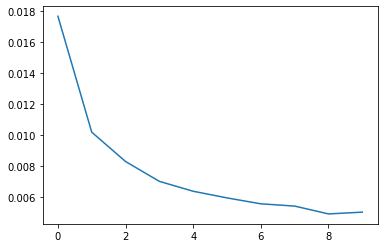

In [ ]:
import matplotlib.pyplot as plt

plt.figure(0)
plt.plot(hist.history['val_loss'])

In [ ]:
encoder.save('/content/MyDrive/MyDrive/encoder.h5')

####################


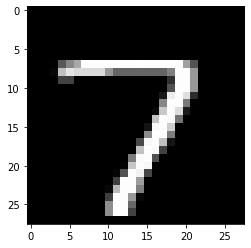

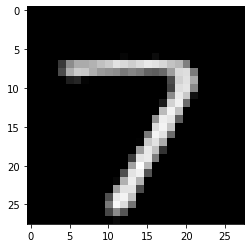

In [ ]:
# for ix in range(10):
ix = 1234
plt.figure(ix)
imgb = x[ix]
plt.imshow(imgb.reshape((28,28)), cmap='gray')
imga = autoencoder.predict(imgb.reshape((1, 28, 28, 1)))
plt.figure(ix+1)
plt.imshow(imga.reshape((28,28)), cmap='gray')
print(20*'#')

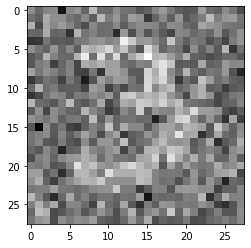

In [ ]:
img = x[9]

img_noisy = img + 0.5 * np.random.normal(loc=0.0, scale=1.0, size=img.shape)
img_noisy.shape

plt.imshow(img_noisy.reshape((28,28)), cmap='gray')

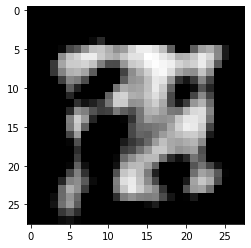

In [ ]:
img_noisy_a = autoencoder.predict(img_noisy.reshape(1, 28, 28, 1))
plt.imshow(img_noisy_a.reshape(28,28), cmap = 'gray')